# introductory text (explain: dataset, task)

For this project, I decided to work with a dataset of 589 snow profile observations that were recorded in Switzerland. This dataset has over 100 different features within each observation which is ideal for a machine learning model.

Using this dataset I want to train a model that can accurately predict the stability level of the snow based on the data collected. This stability level is broken into 5 different classifications 1: very poor, 2: poor, 3: fair, 4: good, and 5: very good. Ideally, it would be advantageous to use a model for backcountry skiing that takes the human factor out of the decision-making. An individual could perform a snow test in the backcountry and give the data to this model. In turn, the model would give the danger level to better inform the backcountry travaler.  

# import requisite modules

In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')

# helper functions (if necessary)

In [241]:
featureDesc = {
    "No": "Consecutive number (1 to 589)",
    "Profile_ID": "Internal profile ID from SLF’s profile data base",
    "Date_time": "Date and time of snow profile observation",
    "Aspect": "Aspect of slope where profile was observed",
    "X-Coordinate (m)": "Easting in Swiss coordinate system",
    "Y-Coordinate (m)": "Northing in Swiss coordinate system",
    "Elevation (m a.s.l.)": "Elevation of profile location",
    "Slope_angle (degrees)": "Incline of slope where profile was observed",
    "Profile_class": "Snow profile hardness classification: 1 to 10 according to Schweizer and Wiesinger (2001)",
    "5-class_Stability": "Stability classification (1: very poor, 2: poor, 3: fair, 4: good, 5: very good) according to Schweizer and Wiesinger (2001)",
    "RB_score": "Rutschblock (RB) score (1 to 7) according to Föhn (1987)",
    "RB_release_type": "Rutschblock release type (1: whole block, 2: partial, 3: edge only) according to Schweizer (2002)",
    "Fracture_plane_quality": "Quality of the fracture plane (1: smooth, 2: rough, 3: irregular) according to Schweizer (2002)",
    "S2008_1 [RB]": "Classification of RB score (1: in critical range, RB ≤ 3; 0: RB > 3) according to Schweizer et al. (2008)",
    "S2008_2 [RT]": "Classification of RB release type (1: whole block; 0: partial or edge only) according to Schweizer et al. (2008)",
    "S2008_3 [Lemons]": "Classification of number of lemons (aka threshold sum) for failure layer (1: Lemons_FL ≥ 5; 0: Lemons_FL < 5) according to Schweizer et al. (2008)",
    "3-class_Stability [sum S2008: 1+2+3]": "3-class stability classification according to Schweizer et al. (2008): number of criteria (RB score, RB release type, Lemons) in critical range: 1 to 3",
    "4-class_Stability [Techel]": "4-class stability classification based on RB score and RB release type (1: very poor, 2: poor, 3: fair, 4: good) according to Techel et al. (2020)",
    "RB_height (cm)": "Height of failure interface in rutschblock test",
    "Snow_depth (cm)": "Snow depth at profile location",
    "Slab_thickness (cm)": "Thickness of slab: thickness of snow layers above failure interface",
    "FL_Thickness (cm)": "Thickness of failure layer",
    "AL_Thickness (cm)": "Thickness of adjacent layer (layer across failure interface from failure layer)",
    "FL_Grain_size_avg (mm)": "Grain size (average) in failure layer",
    "AL_Grain_size_avg (mm)": "Grain size (average) in adjacent layer",
    "FL_Grain_size_max (mm)": "Grain size (max) in failure layer",
    "AL_Grain_size_max (mm)": "Grain size (max) in adjacent layer",
    "FL_Grain_type1": "Grain type in failure layer (primary) (1: PP, 2: DF, 3: RG, 4: FC, 5: DH, 6: SH, 7: MF, 8: IF, 9: FCxr; 0: PPgp; according to Fierz et al. (2009))",
    "FL_Grain_type2": "Grain type in failure layer (secondary)",
    "FL_Hardness": "Hand hardness index of failure layer (1: Fist, 2: Four fingers, 3: One finger, 4: Pencil, 5: Knife) according to Fierz et al. (2009)",
    "FL_Top_Height (cm)": "Top height of failure layer",
    "FL_Bottom_Height (cm)": "Bottom height of failure layer",
    "AL_Top_Height (cm)": "Top height of adjacent layer",
    "AL_Bottom_Height (cm)": "Bottom height of adjacent layer",
    "AL_Hardness": "Hand hardness index of adjacent layer",
    "Hard_Diff": "Hardness difference across failure interface",
    "Abs_Hard_Diff": "Hardness difference across failure interface (absolute value)",
    "Grain_Size_Diff (mm)": "Grain size difference across failure interface",
    "FL_location": "Location of failure layer with regard to failure interface (1: below, 0: above)",
    "Lemon1_E": "Failure layer grain size in critical range (1: ≥ 1.25 mm) according to Schweizer and Jamieson (2007)",
    "Lemon2_R": "Failure layer hardness in critical range (1: ≤ 1.5; Fist to 4 fingers) according to Schweizer and Jamieson (2007)",
    "Lemon3_F": "Failure layer grain type (primary) in critical range (1: persistent; FC, DH, SH, FCxr) according to Schweizer and Jamieson (2007)",
    "Lemon4_dE": "Grain size difference across failure interface in critical range (1: ≥ 0.75 mm) according to Schweizer and Jamieson (2007)",
    "Lemon5_dR": "Hardness difference across failure interface in critical range (1: ≥ 1.7) according to Schweizer and Jamieson (2007)",
    "Lemon6_FLD": "Depth of failure interface (from snow surface) in critical range (1: [18 cm, 94 cm]) according to Schweizer and Jamieson (2007)",
    "Lemons_FL": "Threshold sum or number of lemons in critical range according to Schweizer and Jamieson (2007)",
    "Whumpfs": "Presence (1) or absence (0) of whumpf sounds on day of field observations",
    "Cracks": "Presence (1) or absence (0) of shooting cracks on day of field observations",
    "Avalanche_activity": "Presence (1) or absence (0) of recent avalanches on day of field observations",
    "LN_Local_danger_level_nowcast": "Assessment of danger level by observers after travelling a day in the field (LN: local nowcast; 1: Low, 2: Moderate, 3: Considerable, 4: High), intermediate values allowed",
    "LN_rounded": "Assessment of danger level by observers after travelling a day in the field: rounded to next full danger level",
    "RF_Regional _danger_level_forecast": "Avalanche danger level as forecast in the public bulletin for the day of observation (RF: regional forecast)",
    "Deviation [LN-RF]": "Agreement or deviation between local nowcast and regional forecast",
    "SNPK_Index": "Snowpack structure index according to Techel and Pielmeier (2014)",
    "SNPK_Index_Class": "Classification of snowpack structure index according to Techel and Pielmeier (2014)",
    "HN24 (cm)": "Height of new snow of the last 24 hours (median value of the stations in the surroundings of the profile location)",
    "HN3d (cm)": "Sum of height of new snow of the last 3 days (median value of the stations in the surroundings of the profile location)"
}

def calcResults(clf, X, y, title):
    results = cross_val_predict(clf, X, y, cv=5)
    accuracy = accuracy_score(y, results)
    percision = precision_score(y, results, average=None)
    recall = recall_score(y, results, average=None)

    print(title)
    print("Accuracy: " + str(accuracy))
    print("Percision: " + str(percision))
    print("Recall: " + str(recall) + "\n")

# pre-process, analyze dataset

In [242]:
data = pd.read_csv('/Users/smerdy/Desktop/CS303_MachineLearning/FinalProject/snow_instability_field_data.csv', engine='python', delimiter=';')
data = data.drop(['No', 'Profile_ID', 'Date_time', 'X-Coordinate (m)', 'Y-Coordinate (m)', '3-class_Stability [sum S2008: 1+2+3]', '4-class_Stability [Techel]', 'LN_Local_danger_level_nowcast', 'LN_rounded', 'RF_Regional _danger_level_forecast', 'Deviation [LN-RF]'], axis=1)

nanRows = data[data.isna().any(axis=1)]
print("NAN Rows")
print("Count: " + str(len(nanRows)))
data = data.dropna()

featureCorr = data.corr().loc['5-class_Stability']

positiveAtrList = []
negativeAtrList = []
for row in featureCorr.index:
    if featureCorr[row] > 0.3:
        positiveAtrList.append(row)
    elif featureCorr[row] < -0.3:
        negativeAtrList.append(row)

positiveAtrList.remove('5-class_Stability')

print("\nPositive Feature Correlation to 5-class_Stability:")
print(positiveAtrList)
print("\nNegative Feature Correlation to 5-class_Stability:")
print(negativeAtrList)

NAN Rows
Count: 8

Positive Feature Correlation to 5-class_Stability:
['Profile_class', 'RB_score', 'RB_release_type']

Negative Feature Correlation to 5-class_Stability:
['S2008_1 [RB]', 'S2008_2 [RT]', 'Whumpfs', 'Cracks']


# visualize dataset

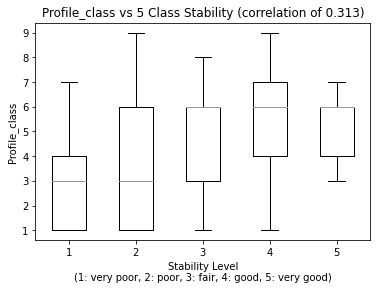

Profile_class: Snow profile hardness classification: 1 to 10 according to Schweizer and Wiesinger (2001)


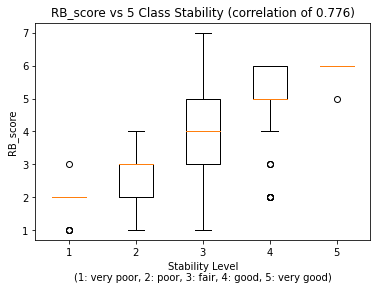

RB_score: Rutschblock (RB) score (1 to 7) according to Föhn (1987)


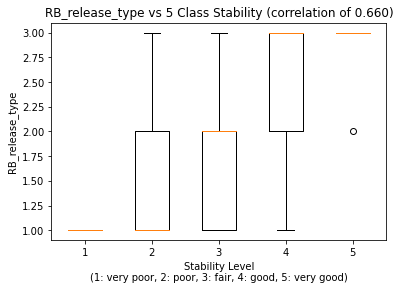

RB_release_type: Rutschblock release type (1: whole block, 2: partial, 3: edge only) according to Schweizer (2002)


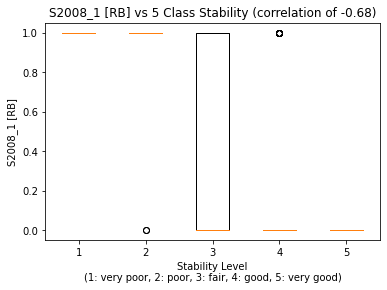

S2008_1 [RB]: Classification of RB score (1: in critical range, RB ≤ 3; 0: RB > 3) according to Schweizer et al. (2008)


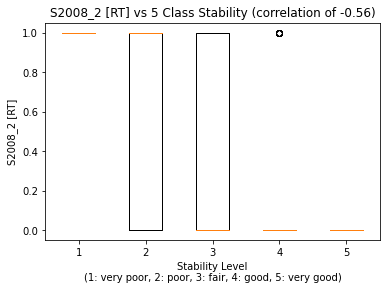

S2008_2 [RT]: Classification of RB release type (1: whole block; 0: partial or edge only) according to Schweizer et al. (2008)


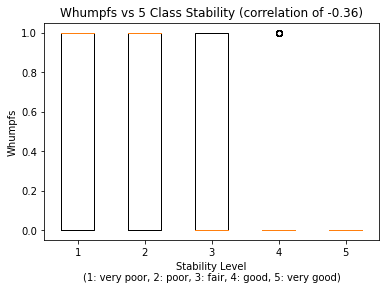

Whumpfs: Presence (1) or absence (0) of whumpf sounds on day of field observations


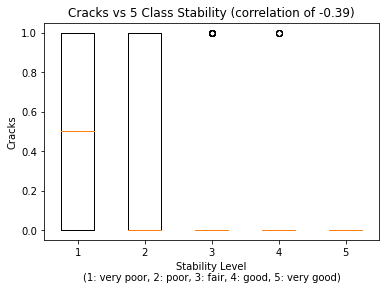

Cracks: Presence (1) or absence (0) of shooting cracks on day of field observations


In [243]:
danger1 = data['5-class_Stability'] == 1
danger2 = data['5-class_Stability'] == 2
danger3 = data['5-class_Stability'] == 3
danger4 = data['5-class_Stability'] == 4
danger5 = data['5-class_Stability'] == 5

for atr in positiveAtrList:
    plt.figure()
    plt.boxplot([data[atr][danger1], data[atr][danger2], data[atr][danger3], data[atr][danger4], data[atr][danger5]])
    plt.title(atr + " vs 5 Class Stability (correlation of " + str(featureCorr[atr])[0:5] + ")")
    plt.xlabel("Stability Level\n(1: very poor, 2: poor, 3: fair, 4: good, 5: very good)")
    plt.ylabel(atr)
    plt.show()
    print(atr + ": " + featureDesc[atr])
    
for atr in negativeAtrList:
    plt.figure()
    plt.boxplot([data[atr][danger1], data[atr][danger2], data[atr][danger3], data[atr][danger4], data[atr][danger5]])
    plt.title(atr + " vs 5 Class Stability (correlation of " + str(featureCorr[atr])[0:5] + ")")
    plt.xlabel("Stability Level\n(1: very poor, 2: poor, 3: fair, 4: good, 5: very good)")
    plt.ylabel(atr)
    plt.show()
    print(atr + ": " + featureDesc[atr])

# experiment with algorithms, feature sets, parameters, etc.,

In [244]:
featureSelection = positiveAtrList + negativeAtrList
y = data['5-class_Stability']

treeX = data[featureSelection]
dTree = tree.DecisionTreeClassifier()
print(dTree)
dTree = dTree.fit(treeX, y)
calcResults(dTree, treeX, y, "Default DT w/ features >0.3 & <-0.3")

knnX = data[featureSelection]
knn = KNeighborsClassifier(n_neighbors=3, algorithm='auto')
print(knn)
knn.fit(knnX,y)
calcResults(knn, knnX, y, "Default KNN w/ features >0.3 & <-0.3")

treeX = data[positiveAtrList]
dTree = tree.DecisionTreeClassifier()
print(dTree)
dTree = dTree.fit(treeX, y)
calcResults(dTree, treeX, y, "Default DT w/ features >0.3")

treeX = data[negativeAtrList]
dTree = tree.DecisionTreeClassifier()
print(dTree)
dTree = dTree.fit(treeX, y)
calcResults(dTree, treeX, y, "Default DT w/ features <-0.3")

treeX = data[positiveAtrList]
dTree = tree.DecisionTreeClassifier(random_state=1)
print(dTree)
dTree = dTree.fit(treeX, y)
calcResults(dTree, treeX, y, "Random State on DT w/ features >0.3")

dTree = tree.DecisionTreeClassifier(criterion="entropy")
print(dTree)
dTree = dTree.fit(treeX, y)
calcResults(dTree, treeX, y, "Criterion Entropy DT w/ features >0.3")

dTree = tree.DecisionTreeClassifier(splitter="random")
print(dTree)
dTree = dTree.fit(treeX, y)
calcResults(dTree, treeX, y, "Splitter Random DT w/ features >0.3")

dTree = tree.DecisionTreeClassifier(splitter="random", criterion="entropy")
print(dTree)
dTree = dTree.fit(treeX, y)
calcResults(dTree, treeX, y, "Splitter Random, Criterion Entropy DT w/ features >0.3")

knn = KNeighborsClassifier(n_neighbors=6, algorithm='auto')
print(knn)
knn.fit(knnX,y)
calcResults(knn, knnX, y, "N_Neighbors:6 KNN w/ features >0.3 & <-0.3")


DecisionTreeClassifier()
Default DT w/ features >0.3 & <-0.3
Accuracy: 0.7022375215146299
Percision: [0.39130435 0.6870229  0.75581395 0.71232877 0.43478261]
Recall: [0.40909091 0.75       0.78313253 0.63414634 0.38461538]

KNeighborsClassifier(n_neighbors=3)
Default KNN w/ features >0.3 & <-0.3
Accuracy: 0.6884681583476764
Percision: [0.36       0.66666667 0.743083   0.6918239  0.5       ]
Recall: [0.40909091 0.7        0.75502008 0.67073171 0.34615385]

DecisionTreeClassifier()
Default DT w/ features >0.3
Accuracy: 0.7211703958691911
Percision: [0.55       0.70895522 0.75384615 0.7005988  0.        ]
Recall: [0.5        0.79166667 0.78714859 0.71341463 0.        ]

DecisionTreeClassifier()
Default DT w/ features <-0.3
Accuracy: 0.6385542168674698
Percision: [0.         0.65467626 0.7371134  0.55691057 0.        ]
Recall: [0.         0.75833333 0.57429719 0.83536585 0.        ]

DecisionTreeClassifier(random_state=1)
Random State on DT w/ features >0.3
Accuracy: 0.7246127366609294
Per

# visualize experimental results

KNeighborsClassifier(n_neighbors=6)
N_Neighbors:6 KNN w/ features >0.3 & <-0.3
Accuracy: 0.7452667814113597
Percision: [0.44       0.7265625  0.78651685 0.73913043 0.        ]
Recall: [0.5        0.775      0.84337349 0.72560976 0.        ]



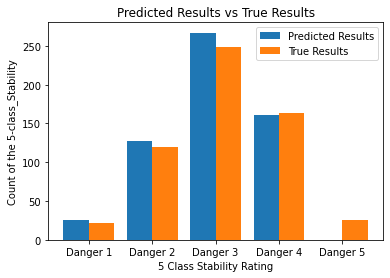

In [245]:
knnX = data[featureSelection]
knn = KNeighborsClassifier(n_neighbors=6, algorithm='auto')
print(knn)
knn.fit(knnX,y)
calcResults(knn, knnX, y, "N_Neighbors:6 KNN w/ features >0.3 & <-0.3")

results = cross_val_predict(knn, knnX, y, cv=5)
results = results.tolist()
resultsCount = []
for x in range(1, 6):
    resultsCount.append(results.count(x))

realLabel = y.tolist()
realCount = []
for x in range(1, 6):
    realCount.append(realLabel.count(x))
  
X = ['Danger 1', 'Danger 2', 'Danger 3', 'Danger 4', 'Danger 5']
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, resultsCount, 0.4, label = 'Predicted Results')
plt.bar(X_axis + 0.2, realCount, 0.4, label = 'True Results')
  
plt.xticks(X_axis, X)
plt.xlabel("5 Class Stability Rating")
plt.ylabel("Count of the 5-class_Stability")
plt.title("Predicted Results vs True Results")
plt.legend()
plt.show()

# analyze / explain experimental results

I found that my experimental accuracy results were close between a k nearest neighbor model, and a decision tree model. I tested these models because the dataset was mostly qualitative which works well with these models. Ultimately I ended up using a KNeighborsClassifier with a neighbor count of 6 and features that have a correlation greater than 0.3 and less than -0.3 to the 5 class stability. The results of my model show that it can not identify when an item should be at a danger level 5. For this reason, I believe it tends to overestimate each of the other values. This may be caused by having a large n value (n_neighbors). However, by decreasing this value the overall accuracy is lowered.

# conclusion 

I found that using a k nearest neighbor model to predict the 5 class stability level of the snow yielded the most accurate results. Additionally, selecting seven features with the highest positive and negative correlation gave the best accuracy. In the future, this project could be implemented into a backcountry app that would help travelers as they move through the backcountry. I think that with a larger dataset and more tweaking of the model, an even higher accuracy could be achieved. 
